In [1]:
from init import *

In [2]:
matplotlib.rc('figure', figsize=(15, 10))

In [3]:
from src.loaded_files import *

# Validation of $P_\mathrm{out}$ and USWTDB

See also figures ...

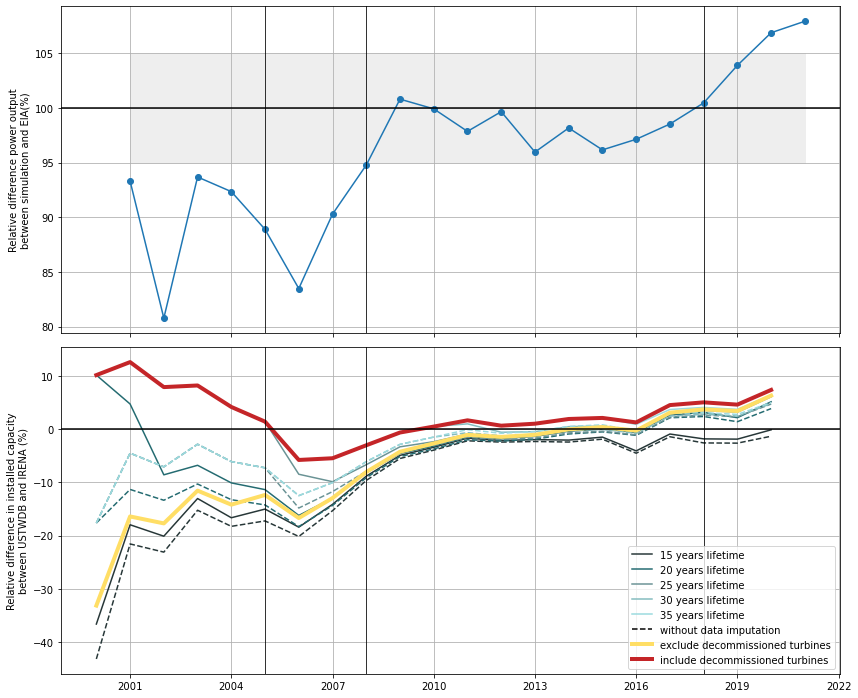

In [99]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

rel_error_p_out = (100 * p_out_model / p_out_eia)
axes[0].plot(rel_error_p_out.time.dt.year, rel_error_p_out, 'o-')
axes[0].set_ylabel('Relative difference power output\nbetween simulation and EIA(%)')
axes[0].grid()
axes[0].axhline(100, color='k')

plot_irena_capacity_validation(turbines, load_turbines(replace_nan_values=False), ax= axes[1])
axes[1].set_ylabel('Relative difference in installed capacity\nbetween USTWDB and IRENA (%)')

for ax in axes:
    for year in (2005, 2008, 2018):
        ax.axvline(year, color='k', linewidth=0.8)
        
axes[0].fill_between([2001, 2021], 95, 105, color='#EEE')

## Would the assumption of a turbine life time increase confidence?

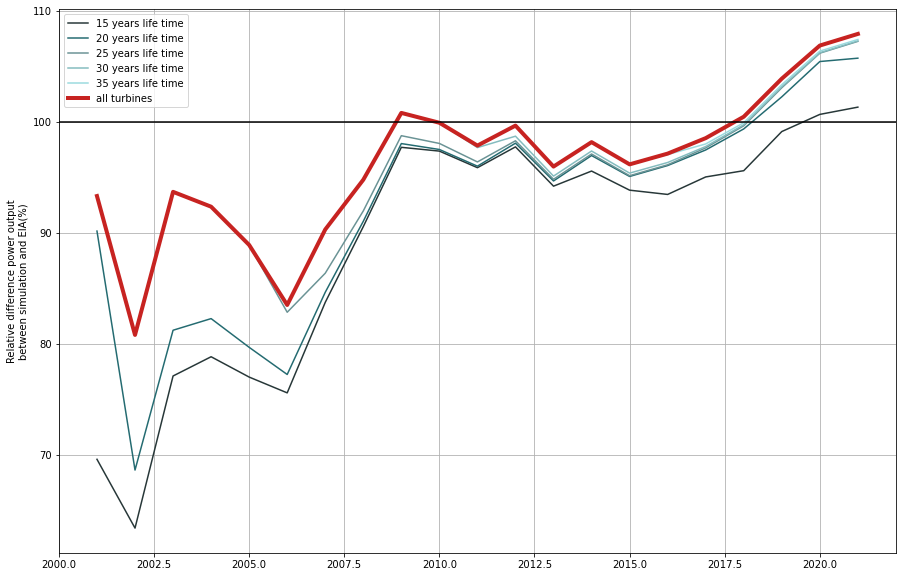

In [110]:
COLORS = ("#273738", "#246b71", "#6a9395", "#84bcbf", "#9bdade")
LIFETIMES = (15, 20, 25, 30, 35)

for lifetime, color in zip(LIFETIMES, COLORS):
    plt.plot(
        rel_error_p_out.time.dt.year, 100 * p_out_model_raw.where(turbine_age < lifetime, 0).sum(dim='turbines') / p_out_eia,
         '-',
        color=color,
        label=f"{lifetime} years life time")
    
rel_error_p_out = (100 * p_out_model / p_out_eia)
plt.plot(rel_error_p_out.time.dt.year, rel_error_p_out, '-', color=TURBINE_COLORS[4], linewidth=4, label="all turbines")

plt.legend();
plt.ylabel('Relative difference power output\nbetween simulation and EIA(%)')
plt.axhline(100, color='k')
plt.grid();